# ORIE 5355/INFO 5370 HW 1: Survey Weighting

 - Name: Joy Wang
 - Net-id: zw673
 - Date: 09/11/2023
 - Late days used for this assignment: 1
 - Total late days used (counting this assignment): 1
 - People with whom you discussed this assignment: None

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/AM1x5qEnLCvxsgrJ7

We have marked questions in <font color='blue'> blue </font>. Please put answers in black (do not change colors). You'll want to write text answers in "markdown" mode instead of code. In Jupyter notebook, you can go to Cell > Cell Type > Markdown, from the menu. Please carefully read the late days policy and grading procedure [here](https://orie5355.github.io/Fall_2023/assignments/). In that link, we also give some tips on exporting your notebook to PDF, which is required for GradeScope submission. 

A few notes about this homework:
1. This homework is purposefully heavy in using the Pandas package. Being able to explore data is an essential data science skill that you'll use throughout this class and your career -- even if the polling/politics application is not interesting to you. I encourage you to practice Pandas and learn how to use it well. Your code will NOT be graded on efficiency.
2. Some of the questions can be interpreted in multiple ways. That is always true in data science. You'll need to make judgment calls for what analysis to do. For the homework, you'll still receive full points for any "reasonable" choice. Also feel free to ask questions on EdStem. 

Note: We sometimes provide sample images of what your output should look like. These are for clarification of what we are looking for. The numbers in the images are not necessarily correct, and your output does not need to look exactly like the images.

# Conceptual component

### 1) Reading

<font color='blue'> Please read Sections 3 and 4 (pages 6-13) here: https://www.nber.org/system/files/working_papers/w20830/w20830.pdf, and answer the following questions.

<font color='blue'> Please summarize the sections in no more than two sentences. 

It is more costly to leave negative rather than positive feedback, which makes the feedback system biased. Defining "effective" PP (EPP) as the number of positive feedback divided by total transactions is a useful way to indicate that transacting with higher EPP sellers decreases the probability that a bad buyer experience will occur.

<font color='blue'> Do you think it's a problem that most ratings are positive? If so, why? Answer in no more than four sentences. Please incorporate concepts discussed in class in your answer. 

Yes. In many hypotheses, some unmeasured confoundings might lead to differential non-response; that is, people who have bad experiences may prefer not to reply with a rating or people are kind and don't want to hurt others' livelihood. Rating inflation makes the rating system biased, which is not helpful for users to figure out good sellers from bad ones. Also, sellers may be more likely to feel competitive and, therefore, push explicit pressure on buyers in turn. 

### 2) Personal reflection

<font color='blue'> Think back to a time that you trained a model on data from people or gathered opinions via a survey (an informal one is fine). If you have not done that before, you may answer these questions about an article in the news that reported on public opinions or a model that you think might be in deployment at a company or organization with which you interact (for example, Amazon, google maps, etc)

<font color='blue'> Briefly summarize the scenario in no more than two sentences. 

I previously conducted a survey questionnaire about the romantic experiences and backgrounds of Tongji University students. After sharing this questionnaire in the student group, it went viral because students were very interested in finding out if there were any "relationship gurus" among them or gauging their own romantic experiences and popularity.

<font color='blue'> What was the construct that you cared about/wanted to measure? What was the measurement (numerical data)? In what ways did the measurement not match the construct you cared about? Answer in no more than 4 sentences.  

The structure I care about is how rich the romantic experience of college students is, and how their background and conditions affect the romantic experience.

I paid attention to the appearance, personality, academic performance, hobbies, etc. of the respondents, which are ranking data for 0-5, while the number of romantic experiences is a numerical value which can be any nonnegative integer.



<font color='blue'> What selection biases/differential non-response issues occurred and how did it affect your measurement? (If your answer is "None," explain exactly why you believe the assumptions discussed in class were met). Answer in no more than 3 sentences. 

In the data collected from the questionnaire, it was found that there are many people with perfect conditions, and almost everyone has very rich romantic experiences, which seems biased. This may be related to the fact that people with better romantic experiences have a higher response rate, or that people tend to answer with a higher value to show better social connection status.

<font color='blue'> Given what we have learned in class so far, what would you do differently if faced with the same scenario again? Answer in no more than 3 sentences. 

For differential non-response, I will do stratification instead of surveying completely random people. Learn more about students, create groups such that the response rates is not correlated with their answer within each group. I also will do weighting to mitigate over- and under- sampled groups.

# Programming component

<font color='blue'> In this part of the homework, we provide you with data from a poll in Florida before the 2016 Presidential election in the United States. We also provide you with (one pollster's) estimates of who will vote in the 2016 election, made before the election. You will use this data and apply the weighting techniques covered in class.

## Preliminaries to load packages and data

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfpoll = pd.read_csv('polling_data_hw1.csv') # raw polling data
dfpoll.head()

,candidate,age,gender,party,race,education
0,Someone else,30-44,Male,Independent,White,College
1,Hillary Clinton,45-64,Male,Republican,Hispanic,College
2,Hillary Clinton,30-44,Male,Independent,Hispanic,College
3,Hillary Clinton,65+,Female,Democrat,White,College
4,Donald Trump,65+,Female,Republican,White,High School


In [3]:
dfdemographic = pd.read_csv('florida_proportions_hw1.csv') # proportions of population
dfdemographic.head()

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2
0,0.387927,party,NaN,Democrat,NaN
1,0.398788,party,NaN,Republican,NaN
2,0.213285,party,NaN,Independent,NaN
3,0.445928,gender,NaN,Male,NaN
4,0.554072,gender,NaN,Female,NaN


In [4]:
dfdemographic.tail()

dfdemographic contains estimates of likely voters in Florida in 2016. When Demographic_Type_2 is NaN, the row refers to just the marginal population percentage of the group in Demographic_1 of type Demographic_Type_1. When it is not NaN, the row has the joint distribution of the corresponding demographic groups.

For example, row 0 means that 38.7927% of the electorate is from the Democrat party. Row 113 means that 2.7588% of the electorate is Hispanic AND graduated college. 

## Part A: Raw visualization

<font color='blue'> Here, we'll visualize whether the respondents in the poll match the likely voter estimates. Create a scatter-plot where each point represents one Demographic group (for example, party-Independent), where the X axis is the Electoral_Proportion in dfdemographic, and the Y axis is the proportion in dfpoll (Hint: you will need to calculate this yourself). 

In [2]:
import csv

class Group:
    def __init__(self, age=None, education=None, gender=None, party=None, race=None,p=None,select_p = None):
        self.age = age
        self.education = education
        self.gender = gender
        self.party = party
        self.race = race
        self.p = p
        self.select_p = 0

    def __str__(self):
        return f"Group(age={self.age}, education={self.education}, gender={self.gender}, party={self.party}, race={self.race}, p={self.p}, select_p={self.select_p})"

# instantiate object group
groups = []
with open('florida_proportions_hw1.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    current_group = {}  
    for row in reader:
        p=row['Electoral_Proportion']
        current_group['p']=p
        demographic_1 = row['Demographic_1']
        demographic_type_1 = row['Demographic_Type_1']
        
        if demographic_type_1 == 'age':
            current_group['age'] = demographic_1
        elif demographic_type_1 == 'education':
            current_group['education'] = demographic_1
        elif demographic_type_1 == 'gender':
            current_group['gender'] = demographic_1
        elif demographic_type_1 == 'party':
            current_group['party'] = demographic_1
        elif demographic_type_1 == 'race':
            current_group['race'] = demographic_1
        
        
        if 'Demographic_Type_2' in row and 'Demographic_2' in row:
            demographic_type_2 = row['Demographic_Type_2']
            demographic_2 = row['Demographic_2']
            if demographic_type_2 == 'age':
                current_group['age'] = row['Demographic_2']
            elif demographic_type_2 == 'education':
                current_group['education'] = row['Demographic_2']
            elif demographic_type_2 == 'gender':
                current_group['gender'] = row['Demographic_2']
            elif demographic_type_2 == 'party':
                current_group['party'] = row['Demographic_2']
            elif demographic_type_2 == 'race':
                current_group['race'] = row['Demographic_2']

        group = Group(**current_group)
        groups.append(group)
        current_group = {}



class Person:
    def __init__(self, candidate=None, age=None, gender=None, party=None, race=None, education=None):
        self.candidate = candidate
        self.age = age
        self.gender = gender
        self.party = party
        self.race = race
        self.education = education

    def __str__(self):
        return f"Person(candidate={self.candidate}, age={self.age}, gender={self.gender}, party={self.party}, race={self.race}, education={self.education})"



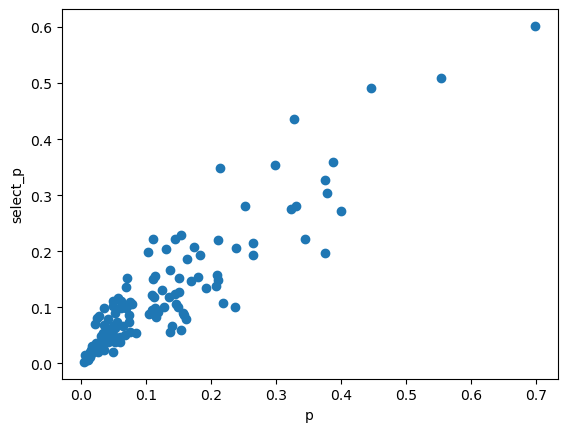

In [3]:
# instantiate object person
people = []
with open('polling_data_hw1.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        candidate = row['candidate']
        age = row['age']
        gender = row['gender']
        party = row['party']
        race = row['race']
        education = row['education']

        person = Person(candidate, age, gender, party, race, education)
        people.append(person)

# print persons
# for idx, person in enumerate(people):
#     print(f"Person {idx + 1}: {person}")
    
# number of Person
total_people = len(people)

# Initialization of population ratio = 0
group_ratios = {group: 0 for group in groups}

for group in groups:
    group.select_p = 0
    
# Iterate over each Person and each Group, check that the Group's requirements are met, and update the ratio of people
for person in people:
    for group in groups:
        if (group.age is None or person.age == group.age) and \
           (group.gender is None or person.gender == group.gender) and \
           (group.party is None or person.party == group.party) and \
           (group.race is None or person.race == group.race) and \
           (group.education is None or person.education == group.education):
            group.select_p += 1

for group in groups:
    group.select_p /= len(people)


# print group information
#for idx, group in enumerate(groups):
#    print(f"Group {idx + 1}: {group}")

    
# visualization
import matplotlib.pyplot as plt

x = [float(x) for x in [group.p for group in groups]]
y = [float(y) for y in [group.select_p for group in groups]]

plt.scatter(x,y)
plt.xlabel('p')
plt.ylabel('select_p')

plt.show()


<font color='blue'> dfdemographic tells us the true proportion of each demographic group in the entire population, the calculated proportion from dfpoll tells us the proportion of each demographic group represented in the poll. For a poll to be representative of the population, ideally we would want the latter to be the same as the former. However, this is hard to achieve in practice.


In your view, which group is most over-represented? Most under-represented? Why? Answer in no more than 3 sentences. There are multiple reasonable definitions of "over" or "under" represented; any choice is fine as long as you justify your answer.</font>

In [4]:
max_diff_group = max(groups, key=lambda group: (float(group.p) - group.select_p))
min_diff_group = min(groups, key=lambda group: (float(group.p) - group.select_p))


print("most under-represented:")
print(max_diff_group)
print("most over-represented:")
print(min_diff_group)

most under-represented:
Group(age=None, education=High School, gender=None, party=None, race=None, p=0.37431564319503, select_p=0.1972318339100346)
most over-represented:
Group(age=None, education=None, gender=None, party=Independent, race=None, p=0.21328503883900501, select_p=0.34832756632064593)


According to the result above, the group with high school education level is most under-represented, accounting for around 37.4% of the entire population while only 19.7% in the poll. Similarly, the group that comes from the independent party is most over-represented as their percentage of the poll is much higher than that of the entire population.

## Part B: Weighting

<font color='blue'> For this question, we'll ignore people who answered anything but "Hillary Clinton" or "Donald Trump."


You'll notice that some of the groups in the polling data ("refused") do not show up in the population percentages. For the questions that require weighting by demographics, ignore those respondents.



### 1) Raw average

<font color='blue'> Below, report the "raw polling average," the percentage of people "Hillary Clinton" divided by the number who answered either Hillary or Trump.

In [56]:
people_sel=[]
Hillary_all=[]
Hnum=0
for person in people:
    if person.candidate =="Hillary Clinton" or person.candidate =="Donald Trump":
        people_sel.append(person)
        if person.candidate =="Hillary Clinton":
            Hnum+=1

Hillary_per=Hnum/len(people_sel)
print(Hillary_per)
Hillary_all.append(Hillary_per)

0.5458333333333333


### 2) Single dimensional marginal weighting (on just 1 demographic type)

<font color='blue'> For each demographic type separately -- age, gender, party, race, and education -- weight the poll by just that demographic type, in accordance to the population proportions given. Report the resulting poll results, and briefly (at most 3 sentences) describe what you observe.


For example, when weighted by race, you'll report:

Weighted by race --- Clinton: 0.530, Trump: 0.470


In [57]:
from collections import defaultdict
def single(people_sel, groups, feature, **kwargs):
    feature_type = {}
    canbyfeature = defaultdict(dict)

    #  feature_type
    total = 0
    for person in people_sel:
        if getattr(person, feature) != 'Refused':
            if getattr(person, feature) not in feature_type:
                feature_type[getattr(person, feature)] = 1
            else:
                feature_type[getattr(person, feature)] += 1
            total += 1

    #  feature_per
    feature_per = {}
    for key in feature_type:
        feature_per[key] = feature_type[key] / total

    #print(feature_per)

    #  canbyfeature
    for person in people_sel:
        if getattr(person, feature) != 'Refused':
            if getattr(person, feature) not in canbyfeature:
                canbyfeature[getattr(person, feature)] = {}
                if person.candidate == "Hillary Clinton":
                    canbyfeature[getattr(person, feature)]['H'] = 1
                else:
                    canbyfeature[getattr(person, feature)]['D'] = 1
            else:
                if person.candidate == "Hillary Clinton" and 'H' not in canbyfeature[getattr(person, feature)]:
                    canbyfeature[getattr(person, feature)]['H'] = 1
                elif person.candidate == "Donald Trump" and 'D' not in canbyfeature[getattr(person, feature)]:
                    canbyfeature[getattr(person, feature)]['D'] = 1
                elif person.candidate == "Hillary Clinton" and 'H' in canbyfeature[getattr(person, feature)]:
                    canbyfeature[getattr(person, feature)]['H'] += 1
                else:
                    canbyfeature[getattr(person, feature)]['D'] += 1
                    
    for out_key in canbyfeature:
        for inner_key in canbyfeature[out_key]:
            canbyfeature[out_key][inner_key] = canbyfeature[out_key][inner_key] / feature_type[out_key]


    # find Group
    def find_group(**kwargs):
        filtered_groups = [group for group in groups if all(getattr(group, key) == value for key, value in kwargs.items())]
        if filtered_groups:
            return filtered_groups[0]
        else:
            return None

    feature_allpeople = {}
    for feature_value in feature_type.keys():
        kwargs[feature] = feature_value
        group = find_group(**kwargs)
        if group:
            feature_allpeople[feature_value] = group.p

    H = 0
    D = 0
    for feature_value in feature_type.keys():
        H += float(feature_allpeople[feature_value]) * canbyfeature[feature_value]['H']

    for feature_value in feature_type.keys():
        D += float(feature_allpeople[feature_value]) * canbyfeature[feature_value]['D']

    return H, D

print("In following lines, the first number is for Clinton and the latter number is for Trump")
print("age",single(people_sel, groups, 'age', education=None, gender=None, party=None, race=None))
print("education",single(people_sel, groups, 'education', age=None, gender=None, party=None, race=None))
print("gender",single(people_sel, groups, 'gender', age=None, education=None, party=None, race=None))
print("party",single(people_sel, groups, 'party', age=None, education=None, gender=None, race=None))
print("race",single(people_sel, groups, 'race', age=None, education=None, gender=None, party=None))
Hillary_all.append(single(people_sel, groups, 'age', education=None, gender=None, party=None, race=None)[0])
Hillary_all.append(single(people_sel, groups, 'education', age=None, gender=None, party=None, race=None)[0])
Hillary_all.append(single(people_sel, groups, 'gender', age=None, education=None, party=None, race=None)[0])
Hillary_all.append(single(people_sel, groups, 'party', age=None, education=None, gender=None, race=None)[0])
Hillary_all.append(single(people_sel, groups, 'race', age=None, education=None, gender=None, party=None)[0])

In following lines, the first number is for Clinton and the latter number is for Trump
age (0.5305420129721238, 0.4694579870278752)
education (0.5440587022833179, 0.4559412977166821)
gender (0.5498233520750473, 0.45017664792495266)
party (0.4987195030437841, 0.5012804969562159)
race (0.5304859528515626, 0.4695140471484364)


According to the result, it can be found that the group who supported Clinton is over-representative in most cases, including age, education, race, and especially party. 
It may be because Trump's supporters were less likely to answer this poll, or Clinton's supporters more likely to refuse to answer their party. 
However, the group of particular genders who support Clinton is under-representative as the portion is smaller than it should be in the entire population.

### 2-dimensional joint distribution weighting

<font color='blue'>Now, for each pair of demographic types in dfdemographic, do the same -- weight the poll by that pair of demographic types, in accordance to the given joint distributions, and briefly (at most 3 sentences) describe what you observe.

For example, when weighted by race and age, you'll find:

Weighted by age and race: Clinton: 0.525, Trump: 0.475

In [58]:
def twod2(people_sel, groups, feature, feature2):
    feature_type = {}
    canbyfeature = defaultdict(dict)
    
    # feature_type
    total = 0
    for person in people_sel:
        if getattr(person, feature) != 'Refused' and getattr(person, feature2) != 'Refused':
            key = (getattr(person, feature), getattr(person, feature2))
            feature_type[key] = feature_type.get(key, 0) + 1
            total += 1
    
    # feature_percentage
    feature_per = {key: count / total for key, count in feature_type.items()}
    
    # candidate by feature
    for person in people_sel:
        if getattr(person, feature) != 'Refused' and getattr(person, feature2) != 'Refused':
            key = (getattr(person, feature), getattr(person, feature2))
            if key not in canbyfeature:
                canbyfeature[key] = {}
            if person.candidate == "Hillary Clinton":
                canbyfeature[key]['H'] = canbyfeature[key].get('H', 0) + 1
            else:
                canbyfeature[key]['D'] = canbyfeature[key].get('D', 0) + 1
    
    for key in canbyfeature:
        for inner_key in canbyfeature[key]:
            canbyfeature[key][inner_key] /= feature_type[key]
    
    # find certain group
    def findgroup(**kwargs):
        filtered_groups = [group for group in groups if all(getattr(group, k) == v for k, v in kwargs.items())]
        for group in filtered_groups:
            return group
    
    feature_allpeople = {}
    for key in feature_type.keys():
        feature_value = key[0]
        feature2_value = key[1]
        kwargs = {feature: feature_value, feature2: feature2_value}
        feature_allpeople[(feature_value, feature2_value)] = findgroup(**kwargs).p
    
    H = 0
    D = 0
    for feature_value in feature_type.keys():
        if canbyfeature[feature_value].get('H') is not None:
            H += float(feature_allpeople[feature_value]) * canbyfeature[feature_value].get('H', 0)
    
    for feature_value in feature_type.keys():
        if canbyfeature[feature_value].get('D') is not None:
            D += float(feature_allpeople[feature_value]) * canbyfeature[feature_value].get('D', 0)
    
    return H, D

temp=[]
print("In following lines, the first number is for Clinton and the latter number is for Trump")
for i in ['age','education','gender','party','race']:
    for j in ['age','education','gender','party','race']:
        if i != j and {i,j} not in temp:
            temp.append({i,j})
            Hillary_all.append(twod2(people_sel, groups,i,j)[0])
            print(i,"and",j,twod2(people_sel, groups,i,j))

In following lines, the first number is for Clinton and the latter number is for Trump
age and education (0.5254829927664427, 0.47451700723355683)
age and gender (0.5332889700974133, 0.466711029902588)
age and party (0.4979923466251235, 0.5020076533748766)
age and race (0.5245159272021908, 0.47548407279780935)
education and gender (0.5475782479595503, 0.4524217520404497)
education and party (0.4935008813708104, 0.5064991186291888)
education and race (0.514272284761291, 0.48572771523870967)
gender and party (0.5029213060686997, 0.4970786939312994)
gender and race (0.5348155487959093, 0.4651844512040904)
party and race (0.5011444670666649, 0.49885553293333473)


According to the result, it can be found that when weighted by education and party, or weighted by age and party, Trump would win the election with more proportion of support, which is different from the initial prediction. 
It may be because Trump's supporters were less likely to answer this poll, or Clinton's supporters more likely to refuse to answer their party. 
Compared with the raw polling average, Clinton's supporters are over-representative in almost all groups except education and gender, which may be because Trump's supporters were more likely to refuse to answer about their education.

### 3) 2-dimensional marginal 

<font color='blue'>We don't always have access to joint distributions across the population -- for example, it may be hard to estimate from past exit polls (surveys done as people are leaving the polling station) what the joint distribution of education and gender is, for example. However, access to marginal distributions are often available. 

As discussed in class, one strategy when you don't have access to joint distributions -- only marginals -- is to _multiply_ the marginal distributions. For example, if 50% of your population is Democratic and 50% is a woman, then pretend that 50% times 50% = 25% of your population is a Democratic women. Clearly this technique is not perfect, but it is sometimes a useful heuristic. (Hint: you can use the marginal distribution provided in dfdemographic)

For the following pairs of Demographic types, report the weighting results if you use the joint distributions in dfdemographic versus if you approximate the joint distribution using the marginals. Briefly (at most 3 sentences) describe what you observe.

(party, gender)

(race, gender)

As an example output, here's the results for two other pairs of demographics:

| Demo1   | Demo2     |    Joint |   Marginal |
|:--------|:----------|---------:|-----------:|
| age     | race      | 0.524516 |   0.5249   | 
| age     | education | 0.525483 |   0.523902 |  

In [59]:
def margin(people_sel, groups, feature, feature2):
    feature_type = {}
    canbyfeature = defaultdict(dict)
    
    # feature_type
    total = 0
    for person in people_sel:
        if getattr(person, feature) != 'Refused' and getattr(person, feature2) != 'Refused':
            key = (getattr(person, feature), getattr(person, feature2))
            feature_type[key] = feature_type.get(key, 0) + 1
            total += 1
    
    # feature_percentage
    feature_per = {key: count / total for key, count in feature_type.items()}
    
    # candidate by feature
    for person in people_sel:
        if getattr(person, feature) != 'Refused' and getattr(person, feature2) != 'Refused':
            key = (getattr(person, feature), getattr(person, feature2))
            if key not in canbyfeature:
                canbyfeature[key] = {}
            if person.candidate == "Hillary Clinton":
                canbyfeature[key]['H'] = canbyfeature[key].get('H', 0) + 1
            else:
                canbyfeature[key]['D'] = canbyfeature[key].get('D', 0) + 1
    
    for key in canbyfeature:
        for inner_key in canbyfeature[key]:
            canbyfeature[key][inner_key] /= feature_type[key]
    
    # find certain group
    def findgroup(**kwargs):
        filtered_groups = [group for group in groups if all(getattr(group, k) == v for k, v in kwargs.items())]
        for group in filtered_groups:
            return group
    
    feature_allpeople = {}
    for key in feature_type.keys():
        feature_value = key[0]
        feature2_value = key[1]
        kwargs1 = {feature: feature_value}
        kwargs2 = {feature2: feature2_value}
        feature_allpeople[(feature_value, feature2_value)] = float(findgroup(**kwargs1).p)*float(findgroup(**kwargs2).p)
    
    H = 0
    D = 0
    for feature_value in feature_type.keys():
        if canbyfeature[feature_value].get('H') is not None:
            H += float(feature_allpeople[feature_value]) * canbyfeature[feature_value].get('H', 0)
    
    for feature_value in feature_type.keys():
        if canbyfeature[feature_value].get('D') is not None:
            D += float(feature_allpeople[feature_value]) * canbyfeature[feature_value].get('D', 0)
    
    return H, D

temp=[]

print("In following lines, the first number is for Clinton and the latter number is for Trump")
for i in ['age','education','gender','party','race']:
    for j in ['age','education','gender','party','race']:
        if i != j and {i,j} not in temp:
            temp.append({i,j})
            Hillary_all.append(margin(people_sel, groups,i,j)[0])
            print(i,"and",j,margin(people_sel, groups,i,j))

            
import pandas as pd
pd.set_option('display.width',5000)
margin_df = pd.DataFrame(columns=["Feature 1", "Feature 2", "Clinton", "Trump"])
twod2_df = pd.DataFrame(columns=["Feature 1", "Feature 2", "Clinton", "Trump"])

temp = []
for i in ['age', 'education', 'gender', 'party', 'race']:
    for j in ['age', 'education', 'gender', 'party', 'race']:
        if i != j and {i, j} not in temp:
            temp.append({i, j})
            H_result, D_result = margin(people_sel, groups, i, j)
            margin_df = pd.concat([margin_df, pd.DataFrame({"Feature 1": [i], "Feature 2": [j], "Clinton": [H_result], "Trump": [D_result]})], ignore_index=True)


temp = []
for i in ['age', 'education', 'gender', 'party', 'race']:
    for j in ['age', 'education', 'gender', 'party', 'race']:
        if i != j and {i, j} not in temp:
            temp.append({i, j})
            H_result, D_result = twod2(people_sel, groups, i, j)
            twod2_df = pd.concat([twod2_df, pd.DataFrame({"Feature 1": [i], "Feature 2": [j], "Clinton": [H_result], "Trump": [D_result]})], ignore_index=True)

results_df = pd.merge(margin_df, twod2_df, on=["Feature 1", "Feature 2"], suffixes=("_marginal", "_joint"))
print(results_df)


In following lines, the first number is for Clinton and the latter number is for Trump
age and education (0.5239021013398512, 0.47609789866014784)
age and gender (0.5336204861210343, 0.46637951387896487)
age and party (0.49560589356749163, 0.5043941064325074)
age and race (0.5248995300419046, 0.4751004699580936)
education and gender (0.5474630723485618, 0.45253692765143816)
education and party (0.49371450047545906, 0.5062854995245409)
education and race (0.5071514204364683, 0.4928485795635305)
gender and party (0.5038023651304451, 0.4961976348695548)
gender and race (0.534844343587629, 0.46515565641236994)
party and race (0.519658653188184, 0.48034134681181495)
   Feature 1  Feature 2  Clinton_marginal  Trump_marginal  Clinton_joint  Trump_joint
0        age  education          0.523902        0.476098       0.525483     0.474517
1        age     gender          0.533620        0.466380       0.533289     0.466711
2        age      party          0.495606        0.504394       0.497992

The differences in the results obtained using the margin and joint methods are very small. 
The most significant difference between the two methods occurs when weighing education and race, indicating that these attributes are related but not independent; that is, people of a specific race may have higher or lower education levels. 
When the amount of data is significant, and there is no apparent relationship between attributes, using marginal method is reasonable.

### 4) Bonus points (up to 2 points): Implement a "cheap" version of the MRP technique mentioned in class.

<font color='blue'> The above techniques use the mean answer among people who share a demographic as the estimate for that demographic. But that wastes information _across_ demographics. For example, maybe people who only have "Some College" are similar enough to people who have "High School" as to provide some useful information. 

First, do the following: use a logistic regression (or your favorite prediction tool) to predict candidate choice, using the demographics. You might want to convert some demographics (like education) to ordered numeric (e.g., 1, 2, 3) as opposed to using discrete categories. 

Here, you will earn partial bonus points by just reporting the predictions and comparing them to the means of each covariate group in the raw polling data. Give a scatter-plot, where each point is one combination of full demographics (age, gender, party, race/ethnicity, education), the X axis is the raw polling average for that combination, and the Y axis is your regression prediction for that combination.   

Then, once you have predictions for each set of covariates, "post-stratify" to get a single population estimate by plugging them into the above weighting techniques, where you use the predictions instead of the raw averages in that cell. Report the resulting estimates if you do the 2-dimensional joint weighting (on every pair).

### 5) Bonus points (up to 2 points): Implement full "raking" using all the demographic covariates, i.e., match all the marginals without assuming independence, as opposed to just one or two marginal distributions.

<font color='blue'> Hint: at the heart of raking is calculating a weight for each survey respondent, so that the weights, when summed up, matches the population on desired marginals as much as possible. 

For example, suppose we have a survey with two respondents, A likes chocolate and B hates chocolate. We know that in the population, 80\% of people like chocolate (the number is made up). So in a representative sample with 2 respondents, we would expect to see 1.6 respondents who like chocolate. Thus, one possible thing to do is we assign A with weight 1.6 and B with weight 0.4, and then use these weights to weigh their answers to the question we care about.

Of course, when the number of respondents and the number of demographic dimensions that we want to match get larger, finding the weights itself becomes harder. There are mainly two ways to do this. The first is through an iterative approach known as Iterative Proportional Fitting (IPF). IPF iterates through each demographic variable at a time, and adjusts the weights of all respondents through post stratification. IPF is easier to implement by hand by just following the instructions. The second approach is known as generalized raking, which is done through solving an optimization problem, and proposed by [Deville, J. C., Särndal, C. E., & Sautory, O. (1993)](https://www.tandfonline.com/doi/abs/10.1080/01621459.1993.10476369). This approach attempts to solve one undesirable outcome of IPF that the resulting weights may be unbalanced, which leads to higher variance in the final estimate. [This blog post](https://dev.to/potloc/generalized-raking-for-survey-weighting-2d1d) gives a nice introduction to generalized raking, while providing a code snippet for implementing it in Python (you will have to make suitable changes, of course.)

## Part C: Uncertainty analysis, choices, and discussion

### 1) Education weighting analysis and "refused" answers

<font color='blue'> i. In Part B, you should notice a discrepancy from what we said in class and the data -- weighting by education does _not_ seem to help much in reducing the polling average from being pro-Clinton.

Here, we'll try to dig into the data to see why the methods we tried above might not be perfect, and what data you would want (such as demographic joint distribution) to do better. 

First, aggregate (using the groupby function) the poll results by education. Second, aggregate by education and some of the other covariates (for example, education and race, or education and party). Discuss in 4 sentences or less.

In [50]:
df = pd.read_csv("polling_data_hw1.csv")

print('table of counts')
print('-'*100)
education = df.groupby(['education', 'candidate']).size().unstack(fill_value=0)
print(education)
print('-'*100)

education_age = df.groupby(['education','age','candidate']).size().unstack(fill_value=0)
print(education_age)
print('-'*100)

education_race = df.groupby(['education','race','candidate']).size().unstack(fill_value=0)
print(education_race)
print('-'*100)

education_party = df.groupby(['education','party','candidate']).size().unstack(fill_value=0)
print(education_party)
print('-'*100)

education_gender = df.groupby(['education','gender','candidate']).size().unstack(fill_value=0)
print(education_gender)
print('-'*100)

table of counts
----------------------------------------------------------------------------------------------------
candidate     Do not know  Donald Trump  Hillary Clinton  Someone else  Will not vote
education                                                                            
College                27           141              174            13             23
High School            18            68               78             3              4
Refused                 5             3                2             1              1
Some College           28           115              139            13             11
----------------------------------------------------------------------------------------------------
candidate           Do not know  Donald Trump  Hillary Clinton  Someone else  Will not vote
education    age                                                                           
College      18-29           10            17               32             6      

In [54]:
print('table of percentage')
print('-'*100)
education = df.groupby(['education', 'candidate']).size().unstack(fill_value=0)
education_percentage = education.div(education.sum(axis=1), axis=0)
print(education_percentage)
print('-'*100)


education_age = df.groupby(['education', 'age', 'candidate']).size().unstack(fill_value=0)
education_age_percentage = education_age.div(education_age.sum(axis=1), axis=0)
print(education_age_percentage)
print('-'*100)


education_race = df.groupby(['education', 'race', 'candidate']).size().unstack(fill_value=0)
education_race_percentage = education_race.div(education_race.sum(axis=1), axis=0)
print(education_race_percentage)
print('-'*100)


education_party = df.groupby(['education', 'party', 'candidate']).size().unstack(fill_value=0)
education_party_percentage = education_party.div(education_party.sum(axis=1), axis=0)
print(education_party_percentage)
print('-'*100)

education_gender = df.groupby(['education', 'gender', 'candidate']).size().unstack(fill_value=0)
education_gender_percentage = education_gender.div(education_gender.sum(axis=1), axis=0)
print(education_gender_percentage)
print('-'*100)

table of percentage
----------------------------------------------------------------------------------------------------
candidate     Do not know  Donald Trump  Hillary Clinton  Someone else  Will not vote
education                                                                            
College          0.071429      0.373016         0.460317      0.034392       0.060847
High School      0.105263      0.397661         0.456140      0.017544       0.023392
Refused          0.416667      0.250000         0.166667      0.083333       0.083333
Some College     0.091503      0.375817         0.454248      0.042484       0.035948
----------------------------------------------------------------------------------------------------
candidate           Do not know  Donald Trump  Hillary Clinton  Someone else  Will not vote
education    age                                                                           
College      18-29     0.142857      0.242857         0.457143      0.085714  

Proportionally speaking, people who refuse to answer the question about education level are more likely to select "Trump", so ignoring the data of people who answered "refused" will cause the proportion of selected Clinton to be higher, which will result in weighting education not being beneficial in reducing the average of polls supporting Clinton. Also, the joint distribution of education and gender needs to be better because the men who refused to answer education level all voted for Trump, with a strong preference. 
The effect of using the joint distribution of education and party may be better because people who refuse to answer party are more likely to choose Clinton, and the joint of the two may offset the impact of ignoring "refused" data, while the calculation results before confirming this. 
Finally, some groups are too specific, with high variances.

<font color='blue'> ii. You'll notice that there are some responses with "refused," and that those people in particular are Trump-leaning. Furthermore, there are likely many people who refused to answer the poll at all, who do not show up in the data. The weighting techniques we used above would ignore these people. How would you adjust your procedures/estimates above to take them into account? Answer in at most 3 sentences.

We can examine whether the "Refused" answer is associated with other particular demographic characteristics. We can stratify the sample and call more from the "shy" group to reduce differential non-response. Even just differential opinion, stratification mitigates which groups are over- and under-sampled due to noise. We can also use multi-level regression with post-stratification and try to get more data samples.

<font color='blue'> None of the above techniques deal with selection biases/non-response on _un-measured_ covariates. Do you think that may be an important concern in this dataset? Why or why not? Respond in 3 or fewer sentences.

Yes. In elections, causation is very likely to influence voting outcomes. If nonresponse or selection bias is associated with unmeasured covariates, it may result that the response or selected sample may not be representative of the entire population, and it may be difficult to find undersampled groups and accurately stratify.

### 2) Final estimates

<font color='blue'> Throughout this homework, you made many estimates of the same quantity -- the fraction of people who will vote for Clinton in Florida. Below, plot a histogram of all your estimates.

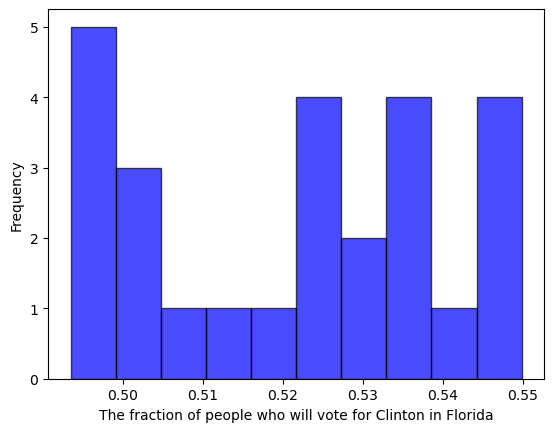

[0.5458333333333333, 0.5305420129721238, 0.5440587022833179, 0.5498233520750473, 0.4987195030437841, 0.5304859528515626, 0.5254829927664427, 0.5332889700974133, 0.4979923466251235, 0.5245159272021908, 0.5475782479595503, 0.4935008813708104, 0.514272284761291, 0.5029213060686997, 0.5348155487959093, 0.5011444670666649, 0.5239021013398512, 0.5336204861210343, 0.49560589356749163, 0.5248995300419046, 0.5474630723485618, 0.49371450047545906, 0.5071514204364683, 0.5038023651304451, 0.534844343587629, 0.519658653188184]


In [81]:
import matplotlib.pyplot as plt

plt.hist(Hillary_all, edgecolor='black', alpha=0.7, color='blue')

plt.xlabel('The fraction of people who will vote for Clinton in Florida')
plt.ylabel('Frequency')

plt.show()
print(Hillary_all)

<font color='blue'> Given all your above analysis, if you were a pollster what would you report as your single estimate? 

In [85]:
mean = sum(Hillary_all) / len(Hillary_all)
print(mean)

0.5215245459811652


<font color='blue'> Justify your choice, in at most 3 sentences

In the raw polling mean, we do not consider whether the proportions of different groups are reliable and may over-sample some groups. In the weighting calculation, we ignore the “refused” group. For example, when weighing party, we discard many samples that support Clinton, and when weighing education, we ignore some samples that support Trump. In the 2-D weighting calculation, many groups are too specific, and groups with only one person exist, which is the method's shortcomings. 
Considering the problems of various forms, I will report the mean of all estimates.

<font color='blue'> Though we did not discuss how to calculate margin of error or standard errors with weighting in this course, what would you say if someone asked you how confident you are in your estimate? You may either qualitatively answer, or try to come up with a margin of error.  

In [93]:
from scipy import stats
std_error = stats.sem(Hillary_all)

confidence_interval = stats.t.interval(0.95, len(Hillary_all) - 1, loc=mean, scale=std_error)

print(f"standard errors：{std_error}")
print(f"95% margin of error：{confidence_interval}")

standard errors：0.0036659969282941173
95% margin of error：(0.5139742839730682, 0.5290748079892621)
